<a href="https://colab.research.google.com/github/ShoSato-047/R_review/blob/main/ShoSato_HW1_(2025)_MLR_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSTRUCTIONS

Save a copy of this notebook in your Google drive.  Complete the HW and submit a **viewable** link (make sure to change share permissions from "**Restricted**" to "**Anyone with link can view**".

***Bold and italicize the font of your responses.***

In [ ]:
#Loading packages required for this HW
install.packages('sandwich')
library(sandwich)
install.packages('lmtest')
library(lmtest)
install.packages('emmeans')
library(emmeans)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘estimability’, ‘numDeriv’, ‘mvtnorm’


Welcome to emmeans.
Caution: You lose important information if you filter this package's results.
See '? untidy'



# Question 1 (30 points)

For this question we will analyze FEV data set, measuring forced expiratory volume (FEV; in liters/second) and its relationship with smoking status, but adjusted for age, among 654 children and teens.

In [ ]:
fev <- read.csv('https://www.dropbox.com/s/2n8xb1d24s4kneo/FEV.csv?dl=1')
head(fev)

,SUBJID,AGE,FEV,HEIGHT,SEX,SMOKE
,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>
1,301,9,1.708,57.0,F,No
2,451,8,1.724,67.5,F,No
3,501,7,1.720,54.5,F,No
4,642,9,1.558,53.0,M,No
5,901,9,1.895,57.0,M,No
6,1701,8,2.336,61.0,F,No


## A)

Consider the plot below:

`geom_smooth()` using formula = 'y ~ x'


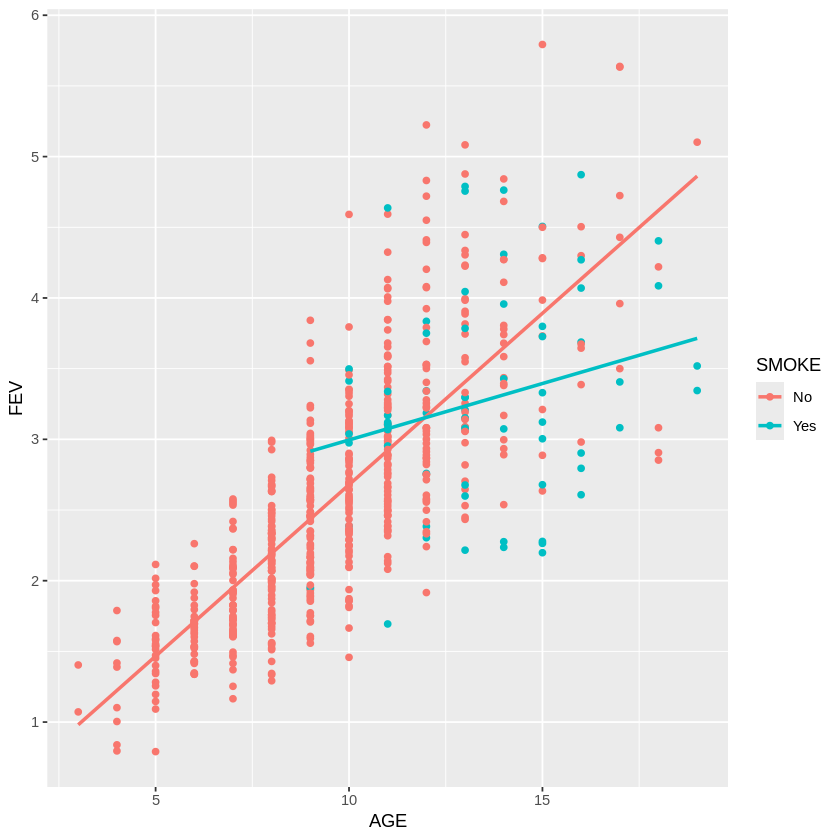

In [ ]:
library(ggplot2)
ggplot(data = fev, aes(x = AGE, y = FEV,col=SMOKE)) +
geom_point() + geom_smooth(method='lm', se = FALSE)

Specify the equation of the multiple linear regression model that is shown in this plot, including definitions of all terms you include in the model.

I'll get you started:

$$E(FEV) = \beta_0 + \beta_1 X_{1i} + \beta_2 U_i + \beta_3 (X_{1i}*U_i) + \epsilon_i$$

where:
$$X_{1i}=Age_i,$$

$$U_i = \begin{cases} 0 & Smoke_i = No \\
1 & Smoke_i = Yes \end{cases}
$$

(**Hint**: if you've specified the right model, and named it `question1_mlr_model`, you should be able to run the command below and verify the first 6 fitted values:)

```
head(question1_mlr_model$fitted.values)

2.43642122329257 2.19386281224292 1.95130440119323 2.43642122329261  2.43642122329261  2.19386281224292
```

In [ ]:
question1_mlr_model <- lm(FEV~AGE + SMOKE + AGE*SMOKE, data = fev)
summary(question1_mlr_model)


Call:
lm(formula = FEV ~ AGE + SMOKE + AGE * SMOKE, data = fev)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.76645 -0.34947 -0.03364  0.33679  2.05990 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.253396   0.082651   3.066  0.00226 ** 
AGE           0.242558   0.008332  29.113  < 2e-16 ***
SMOKEYes      1.943571   0.414285   4.691 3.31e-06 ***
AGE:SMOKEYes -0.162703   0.030738  -5.293 1.65e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5537 on 650 degrees of freedom
Multiple R-squared:  0.5941,	Adjusted R-squared:  0.5922 
F-statistic: 317.1 on 3 and 650 DF,  p-value: < 2.2e-16


In [ ]:
head(question1_mlr_model$fitted.values)

1        2        3        4        5        6 
2.436421 2.193863 1.951304 2.436421 2.436421 2.193863

## B)

Fit the model you specified above, and assess its residual structure. Does the model fit well, and is constant variance assumption appear satisfied?  Explain.

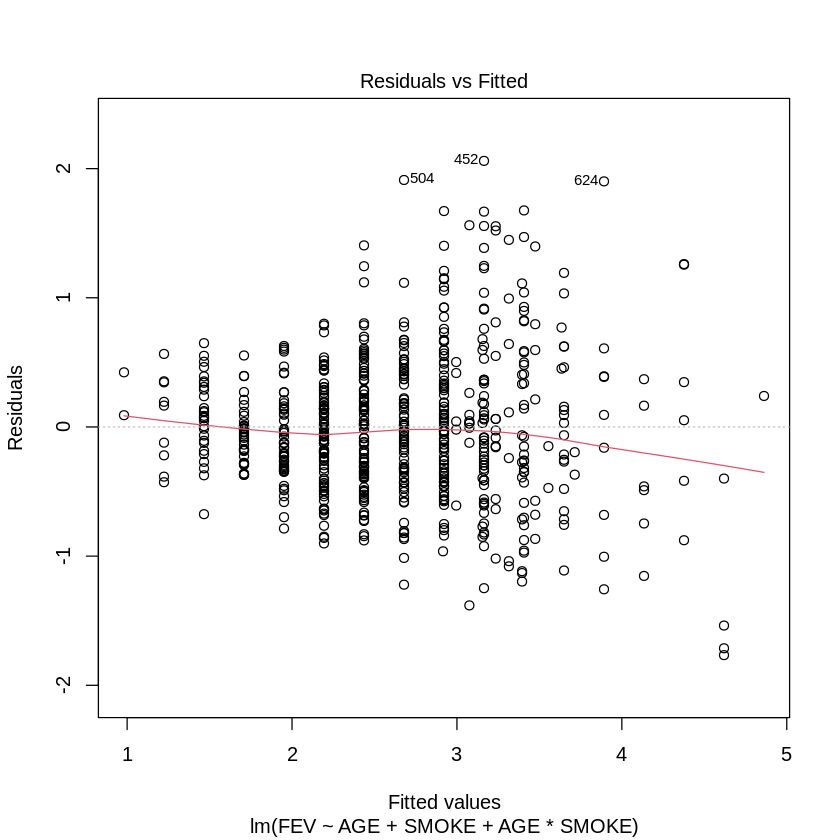

In [ ]:
#Classic residual plot:
plot(question1_mlr_model, which=1)

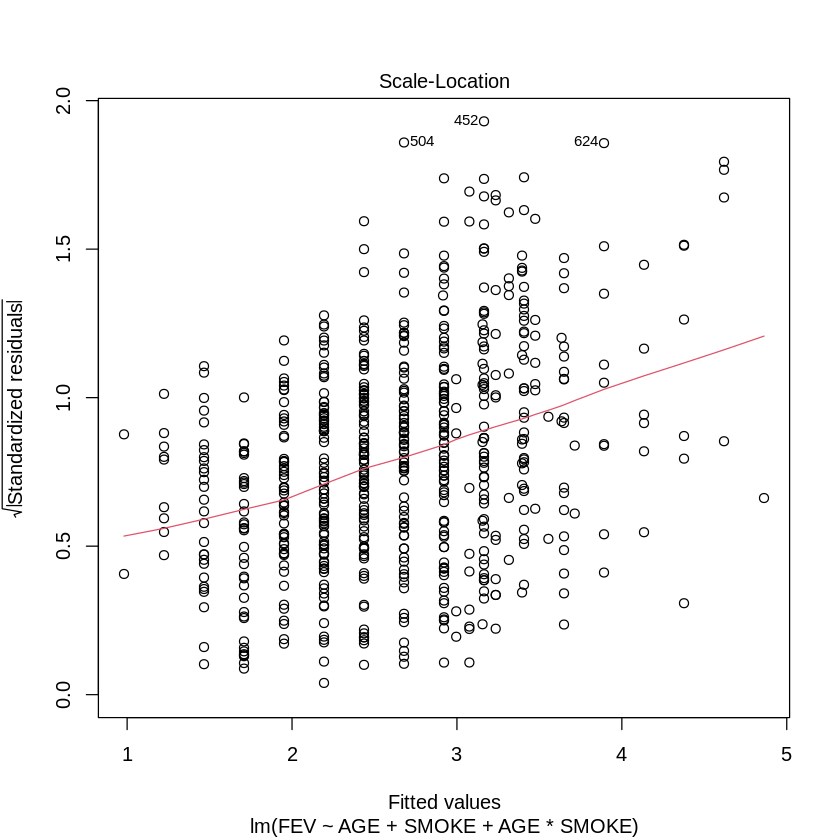

In [ ]:
# Scale-location plot:
plot(question1_mlr_model, which=3)

In [ ]:
# Q 1B - Answer:

# The constant variance is not satisfied. The first plot shows the megaphone shape. Also, the second plot shows the red line is not flat.
# The fit quality is ok. The smooth red line in the first plot is almost flat at around Y = 0.

In [ ]:
# Addressing the violation (non-constant variance)

# Default "constant variance" standard errors:
coeftest(question1_mlr_model)

# Robust, HC, sandwich standard errors:
coeftest(question1_mlr_model, vcov. = vcovHC)


t test of coefficients:

               Estimate Std. Error t value  Pr(>|t|)    
(Intercept)   0.2533955  0.0826508  3.0659   0.00226 ** 
AGE           0.2425584  0.0083315 29.1133 < 2.2e-16 ***
SMOKEYes      1.9435707  0.4142846  4.6914 3.310e-06 ***
AGE:SMOKEYes -0.1627027  0.0307375 -5.2933 1.645e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



t test of coefficients:

              Estimate Std. Error t value  Pr(>|t|)    
(Intercept)   0.253396   0.086601  2.9260  0.003553 ** 
AGE           0.242558   0.010029 24.1862 < 2.2e-16 ***
SMOKEYes      1.943571   0.477703  4.0686 5.312e-05 ***
AGE:SMOKEYes -0.162703   0.035781 -4.5472 6.484e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
summary(question1_mlr_model, vcov. = vcovHC)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.2533955,0.08265075,3.065859,2.260474e-03
AGE,0.2425584,0.00833154,29.113274,6.504859e-120
SMOKEYes,1.9435707,0.41428463,4.691390,3.309624e-06
AGE:SMOKEYes,-0.1627027,0.03073753,-5.293290,1.645078e-07


In [ ]:
coefci(question1_mlr_model, vcov. = vcovHC)

,2.5 %,97.5 %
(Intercept),0.08334493,0.42344612
AGE,0.22286569,0.26225113
SMOKEYes,1.00554358,2.88159789
AGE:SMOKEYes,-0.23296217,-0.09244318


## C)

Is there evidence that the relationship of FEV with smoking status depends on age?  Explain, using an appropriate p-value and 95% confidence interval in your justification (hint: you can base your answer off of *one* of the MLR regression coefficients). Your p-value and 95% confidence interval should be based on whichever standard error estimate you deem most appropriate.

In [ ]:
# Yes, there is evidence to say that the relationship of FEV with smoking status depends on age.
# The p-value for the interaction term (smoking status * age) was 6.484e-06.
# 1 year increases in AGE with Smoking is associated with 0.1627 liters/second decreases in FEV (95% CI: -0.23296, -0.09244).

## D)
Fully characterize the difference in FEV between 11-year-old smokers and 11-year-old nonsmokers.  This means find and interpret a contrast, and determine whether the contrast is significant based on an appropriate p-value and 95% CI. Use whichever standard error estimate you deem most appropriate in your contrast inference.

`geom_smooth()` using formula = 'y ~ x'


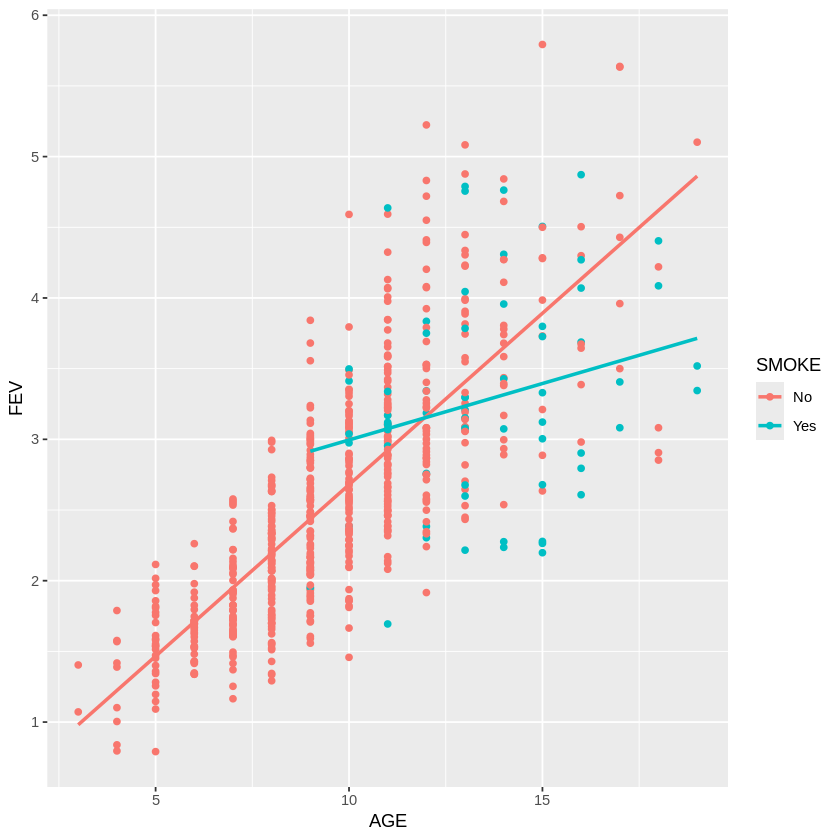

In [ ]:
library(ggplot2)
ggplot(data = fev, aes(x = AGE, y = FEV,col=SMOKE)) +
geom_point() + geom_smooth(method='lm', se = FALSE)

In [ ]:
# Specify AGE = 11, and group by smoking status
emmeans_object_D <- emmeans(question1_mlr_model, specs = ~SMOKE, at = list(AGE = 11))
emmeans_object_D

NOTE: Results may be misleading due to involvement in interactions



 SMOKE emmean     SE  df lower.CL upper.CL
 No      2.92 0.0259 650     2.87     2.97
 Yes     3.08 0.1010 650     2.88     3.27

Confidence level used: 0.95 

In [ ]:
contrast(emmeans_object_D, method = 'pairwise')

 contrast estimate    SE  df t.ratio p.value
 No - Yes   -0.154 0.105 650  -1.470  0.1422


In [ ]:
confint(contrast(emmeans_object_D, method = 'pairwise'))

,contrast,estimate,SE,df,lower.CL,upper.CL
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,No - Yes,-0.1538413,0.1046834,650,-0.3593997,0.05171709


In [ ]:
# Q 1D - Answer:

# 11-year-old smokers have 0.154 liters/second higher FEV than 11-year-old non-smokers.
# This is NOT a statistically significant difference in the average FEV comparing 11-year-olds with smoking and non-smoking status.
# (p-value = 0.1422; 95% CI: -0.35940, 0.05172)

## E)

Fully characterize the difference in FEV between 18-year-old smokers and 18-year-old nonsmokers.   This means find and interpret a contrast, and determine whether the contrast is significant based on an appropriate p-value and 95% CI. Use whichever standard error estimate you deem most appropriate in your contrast inference.

In [ ]:
# Specify AGE = 18, and group by smoking status
emmeans_object_E <- emmeans(question1_mlr_model, specs = ~SMOKE, at = list(AGE = 18))
emmeans_object_E

NOTE: Results may be misleading due to involvement in interactions



 SMOKE emmean     SE  df lower.CL upper.CL
 No      4.62 0.0741 650     4.47     4.77
 Yes     3.63 0.1490 650     3.34     3.93

Confidence level used: 0.95 

In [ ]:
contrast(emmeans_object_E, method = 'pairwise')

 contrast estimate    SE  df t.ratio p.value
 No - Yes    0.985 0.167 650   5.913  <.0001


In [ ]:
confint(contrast(emmeans_object_E, method = 'pairwise'))

,contrast,estimate,SE,df,lower.CL,upper.CL
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,No - Yes,0.9850774,0.1666023,650,0.6579337,1.312221


In [ ]:
# Q 1E - Answer:

# 18-year-old smokers have 0.985 liters/second lower FEV than 18-year-old non-smokers.
# This is a statistically significant difference in the average FEV comparing 18-year-olds with smoking and non-smoking status.
# (p-value < 0.0001; 95% CI: 0.6579, 1.3122)

# Question 2 (40 points)

The data for this task come from J. Park and S. Cho (2010): "Investigating the Effect of Task Complexities on the Response Time of Human Operators to Perform
Emergency Tasks of Nuclear Power Plants," Annals of Nuclear Energy,
Vol. 37, pp. 1160-1171.

The response variable is the time (in seconds) it took for nuclear power plant workers (NPPWs) to complete 35 emergency tacks of varying complexity, where the complexity of the task is measured measured by TACOM score; higher score indicates higher task complexity.  The nationality of the worker (U.S. or non-U.S.) was also recorded.  The power plants were located in South Korea:


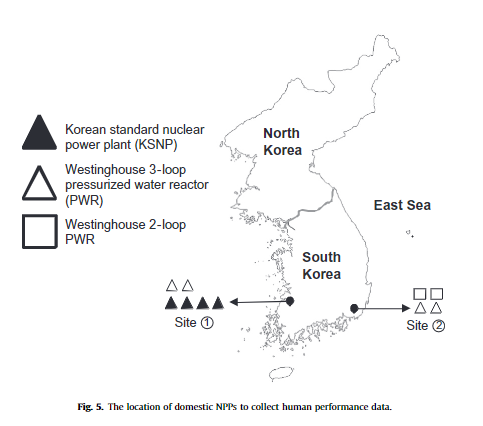

In [ ]:
npp <- read.csv('https://www.dropbox.com/s/id0iv5cxyns9fxt/nuclear_power_plant.csv?dl=1')

## A)

Create a scatterplot of the time/TACOM relationship, with points color-coded by NPPW nationality.  Summarize the plot.

In [ ]:
head(npp)

,TaskNumber,Nationality,Time,TACOM
,<int>,<chr>,<int>,<dbl>
1,1,US,60,3.788
2,2,US,336,6.108
3,3,US,432,6.283
4,4,US,516,6.373
5,5,US,624,6.459
6,6,US,708,6.572


In [ ]:
table(npp$Nationality)


non-US     US 
    35     35 

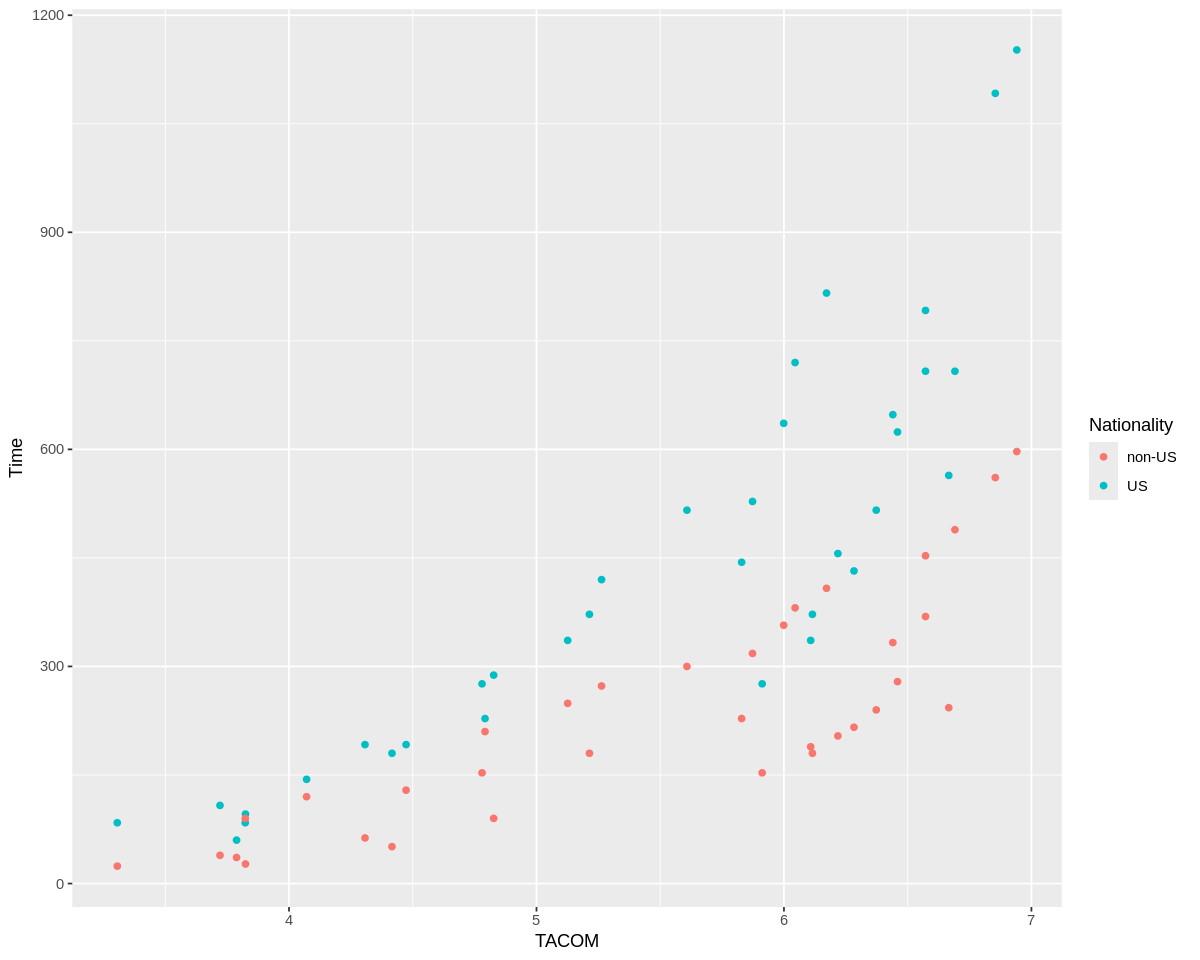

In [ ]:
#This code expands the default plot size:
options(repr.plot.width=10, repr.plot.height=8)

ggplot(data=npp) +
  geom_point(aes(x = TACOM, y = Time, color = Nationality))

In [ ]:
# Q 2A - Answer:

# This scatter plot indicates that as the complexity of work increases (TACOM score), the time required to complete the work becomes longer.
# Additionally, there appears to be a relationship between the nationality of workers and the time taken to complete a task.
# U.S. workers take longer to complete tasks as they become more complex compared to non-U.S. workers.

## B)

Consider the following model:

$$\mbox{Model 1: }E(Time) = \beta_0 + \beta_1 X + \beta_2U + \beta_3 X\cdot U$$

where

* $X = \mbox{TACOM score}$
* $U = \begin{cases} 1 & Nationality = US \\ 0 & Nationality = \mbox{non-US}\end{cases}$

Fit this model and superimpose the fit on the scatterplot.  Then assess the residuals and comment on the quality of the fit.

In [ ]:
# Fitting the model:

B_model <- lm(Time~TACOM + Nationality + TACOM*Nationality, data = npp)
summary(B_model)


Call:
lm(formula = Time ~ TACOM + Nationality + TACOM * Nationality, 
    data = npp)

Residuals:
    Min      1Q  Median      3Q     Max 
-263.36  -60.23   -1.63   52.83  380.90 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -406.09     104.65  -3.880 0.000243 ***
TACOM                 117.23      18.79   6.240 3.54e-08 ***
NationalityUS        -386.01     148.00  -2.608 0.011246 *  
TACOM:NationalityUS   107.98      26.57   4.064 0.000131 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 117 on 66 degrees of freedom
Multiple R-squared:  0.7816,	Adjusted R-squared:  0.7717 
F-statistic: 78.74 on 3 and 66 DF,  p-value: < 2.2e-16


In [ ]:
# Add residuals and fitted values to the data frame:

yhat <- fitted(B_model)
ehat <- residuals(B_model)

In [ ]:
npp$yhat <- yhat
npp$ehat <- ehat
head(npp)

,TaskNumber,Nationality,Time,TACOM,yhat,ehat
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,1,US,60,3.788,61.00871,-1.008712
2,2,US,336,6.108,583.50005,-247.500052
3,3,US,432,6.283,622.91211,-190.912114
4,4,US,516,6.373,643.18117,-127.181175
5,5,US,624,6.459,662.54939,-38.549388
6,6,US,708,6.572,687.99832,20.001680


In [ ]:
coefficients(B_model)

(Intercept)               TACOM       NationalityUS TACOM:NationalityUS 
          -406.0875            117.2305           -386.0060            107.9813

In [ ]:
# Plug and chug:

# US = 1
Nationality = 1
TACOM = 3.788

y_hat = -406.087520968412 + 117.230471134562*TACOM + -386.006005953887*Nationality + 107.981313209406*Nationality*TACOM
y_hat

[1] 61.00871

In [ ]:
Y = 60

Residual = Y - y_hat
Residual

[1] -1.008712

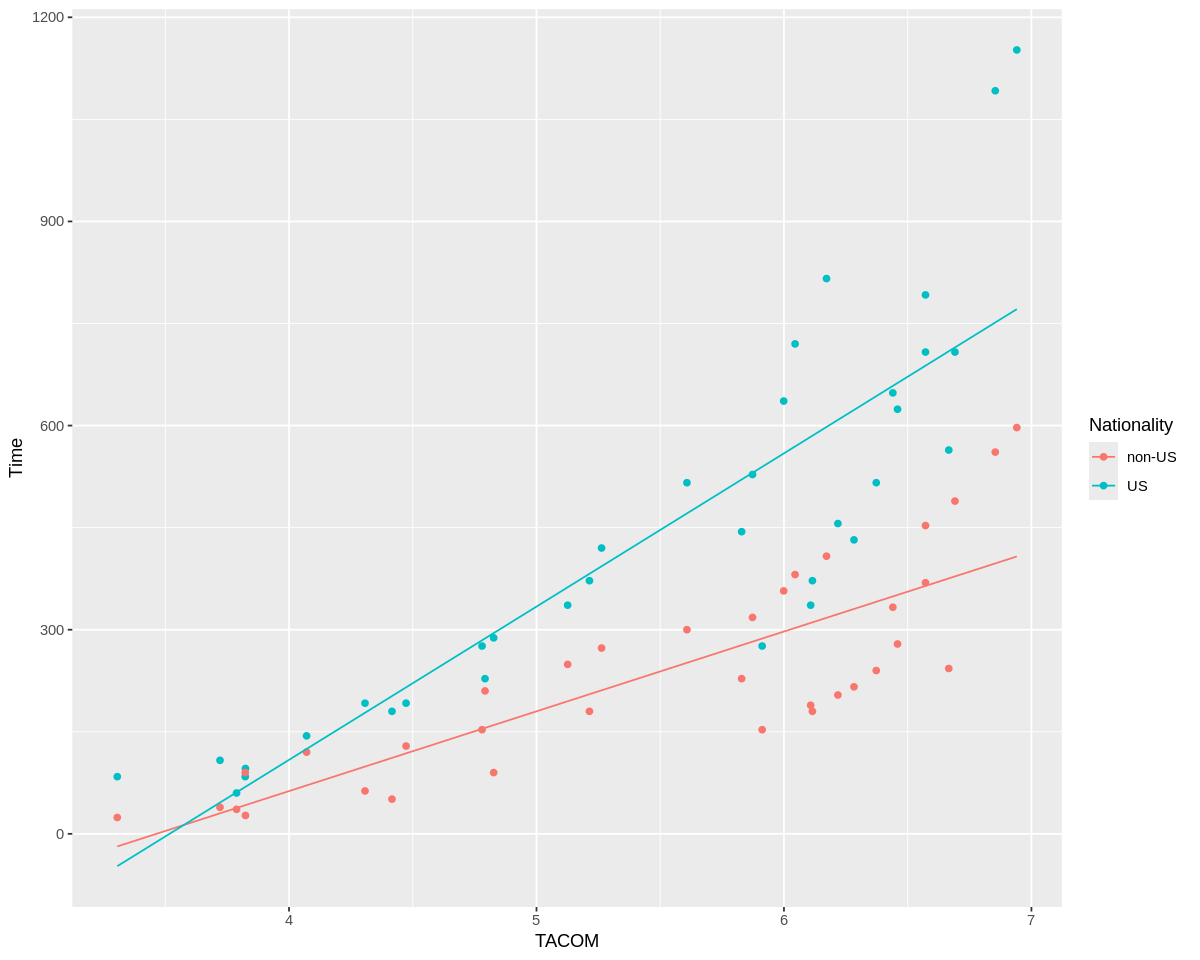

In [ ]:
# Superimposing the fit on the scatterplot
ggplot(data = npp) +
  geom_point(aes(x = TACOM, y = Time, color = Nationality)) +
    geom_line(aes(x = TACOM, y = yhat, color = Nationality))

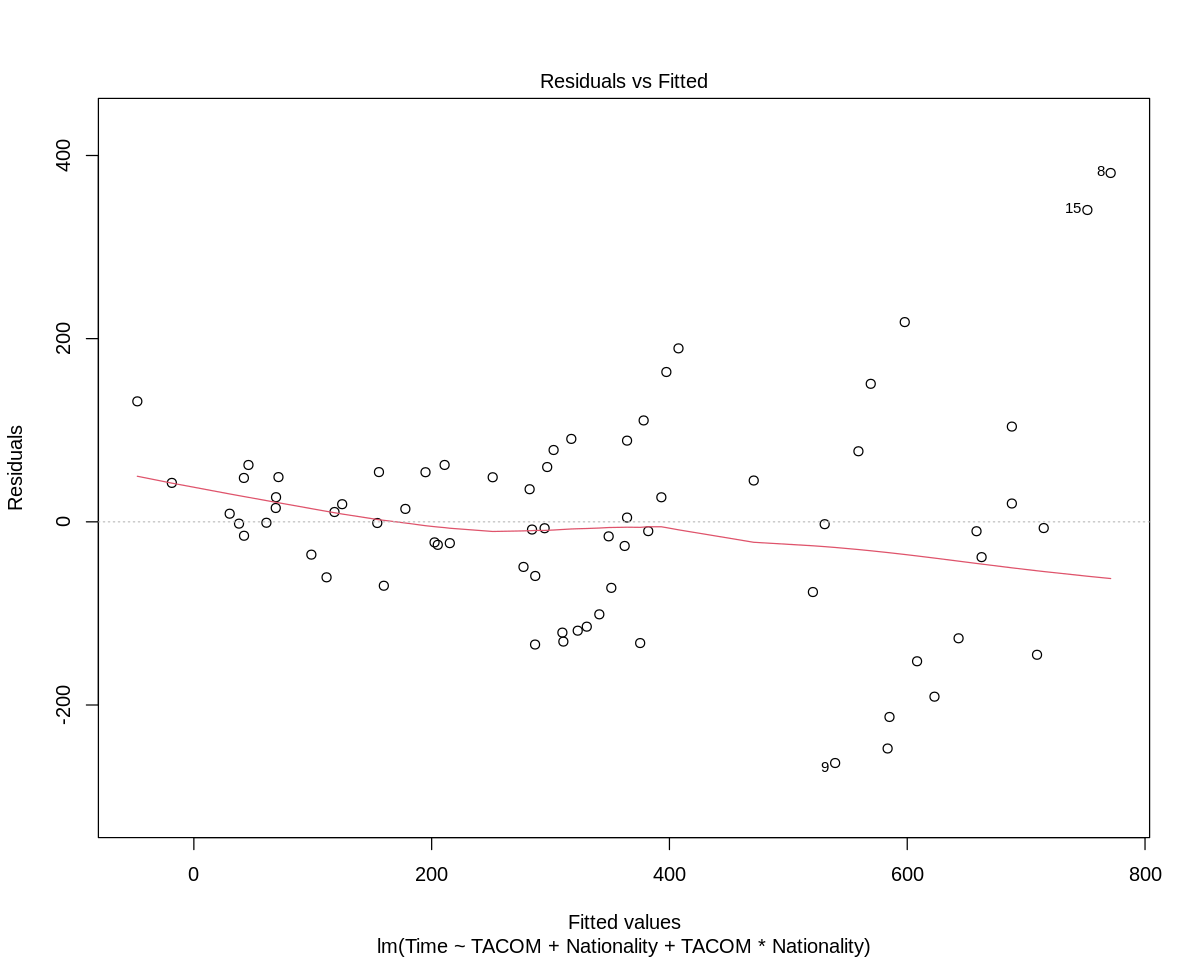

In [ ]:
#Classic residual plot:
plot(B_model, which=1)

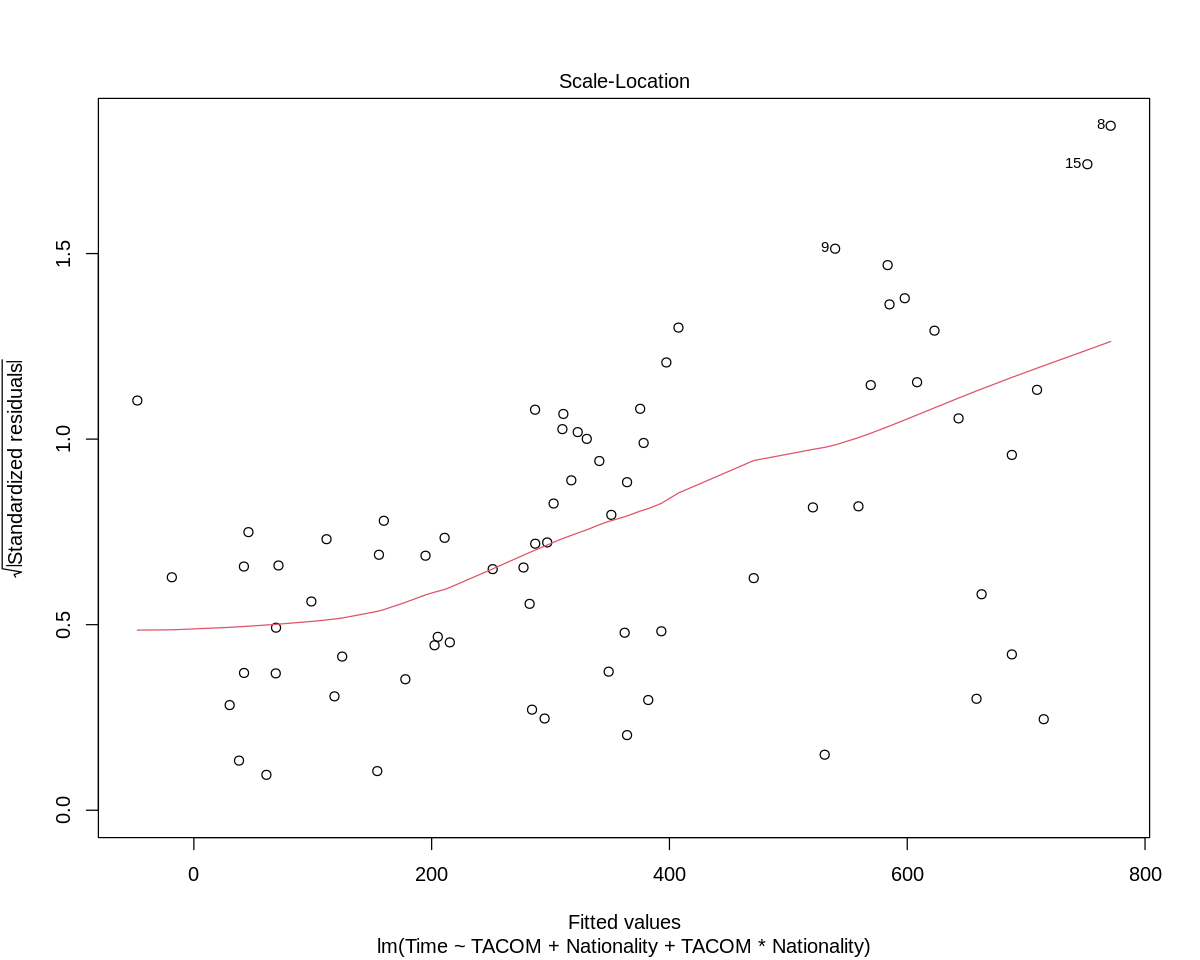

In [ ]:
# Scale-location plot:
plot(B_model, which=3)

In [ ]:
# Q 2B - Comments on the residual plots:

# First plot shows non-constant variance with a megaphone shape.
# Lineality looks ok (the red smooth line looks flat).
# The second plot also shows that the constant variance is not satisfied (the smooth line has a linear trend).

## C)

Consider a second model:
$$\mbox{Model 2: }E(Time) = \mbox{All model 1 terms} + \beta_4 X^2 + \beta_5 X^2 \cdot U$$

Fit this model and superimpose the fits on the scatterplot.  Also assess the residuals and comment on the quality of the fit, especially as it compares to the Model 1 fit.

In [ ]:
# Fitting the model:

# By default, the ^ operator in a formula specifies interaction terms, not exponentiation.
# Wrapping it in I() tells R to treat it as standard mathematical exponentiation instead.

C_model <- lm(Time~TACOM + Nationality + TACOM*Nationality + I(TACOM^2) + I(TACOM^2)*Nationality, data = npp)
summary(C_model)


Call:
lm(formula = Time ~ TACOM + Nationality + TACOM * Nationality + 
    I(TACOM^2) + I(TACOM^2) * Nationality, data = npp)

Residuals:
     Min       1Q   Median       3Q      Max 
-223.332  -54.050   -0.915   69.669  266.347 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                272.95     535.49   0.510    0.612
TACOM                     -154.78     211.63  -0.731    0.467
NationalityUS              594.34     757.29   0.785    0.435
I(TACOM^2)                  26.07      20.21   1.290    0.202
TACOM:NationalityUS       -284.73     299.29  -0.951    0.345
NationalityUS:I(TACOM^2)    37.63      28.58   1.317    0.193

Residual standard error: 109.3 on 64 degrees of freedom
Multiple R-squared:  0.8151,	Adjusted R-squared:  0.8007 
F-statistic: 56.43 on 5 and 64 DF,  p-value: < 2.2e-16


In [ ]:
# Add residuals and fitted values to the data frame:

yhat <- fitted(C_model)
ehat <- residuals(C_model)

In [ ]:
npp$yhat <- yhat
npp$ehat <- ehat
head(npp)

,TaskNumber,Nationality,Time,TACOM,yhat,ehat
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,1,US,60,3.788,116.4741,-56.47414
2,2,US,336,6.108,559.3324,-223.33243
3,3,US,432,6.283,620.5519,-188.55188
4,4,US,516,6.373,653.5555,-137.55547
5,5,US,624,6.459,686.0564,-62.05645
6,6,US,708,6.572,730.1937,-22.19369


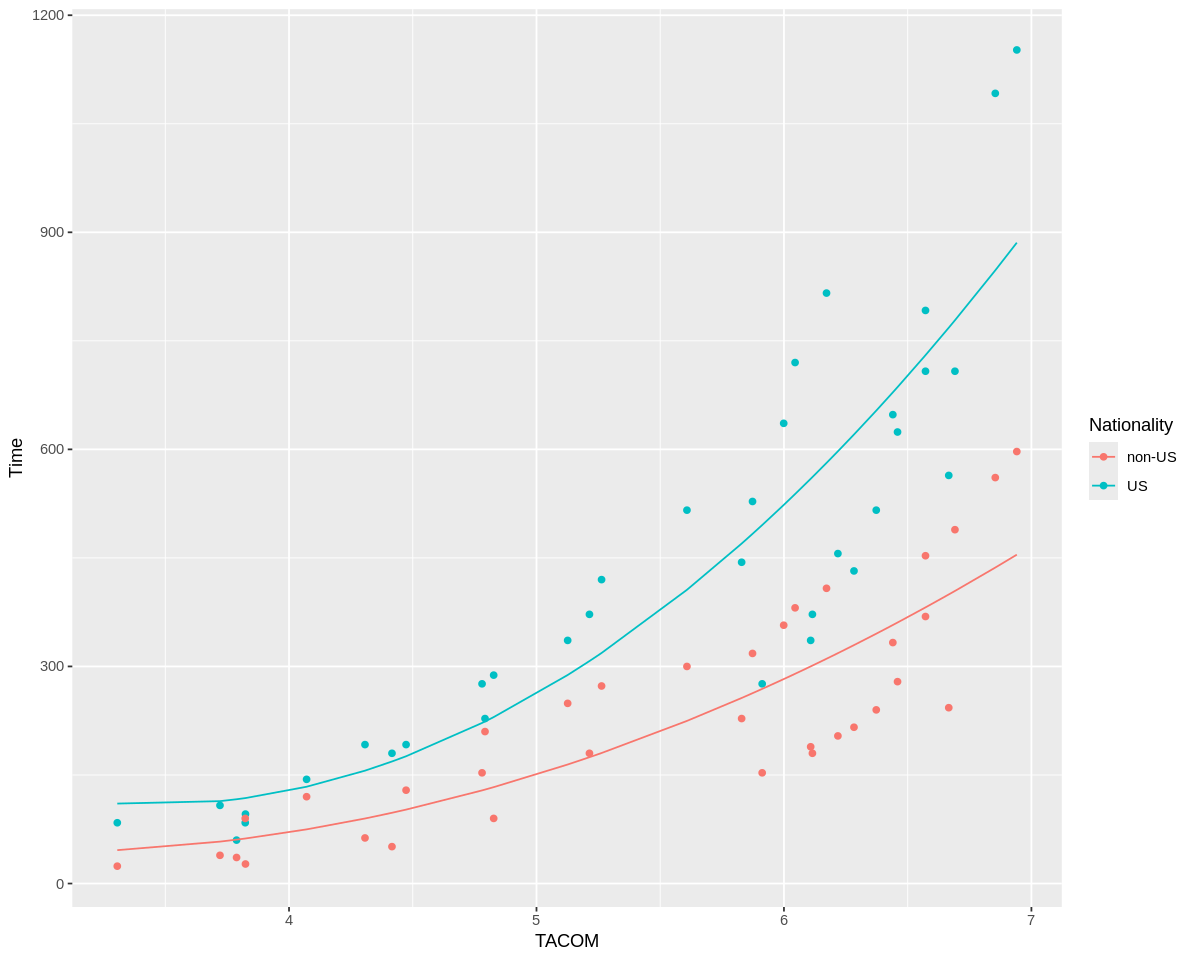

In [ ]:
# Superimposing the fit on the scatterplot
ggplot(data = npp) +
  geom_point(aes(x = TACOM, y = Time, color = Nationality)) +
    geom_line(aes(x = TACOM, y = yhat, color = Nationality))

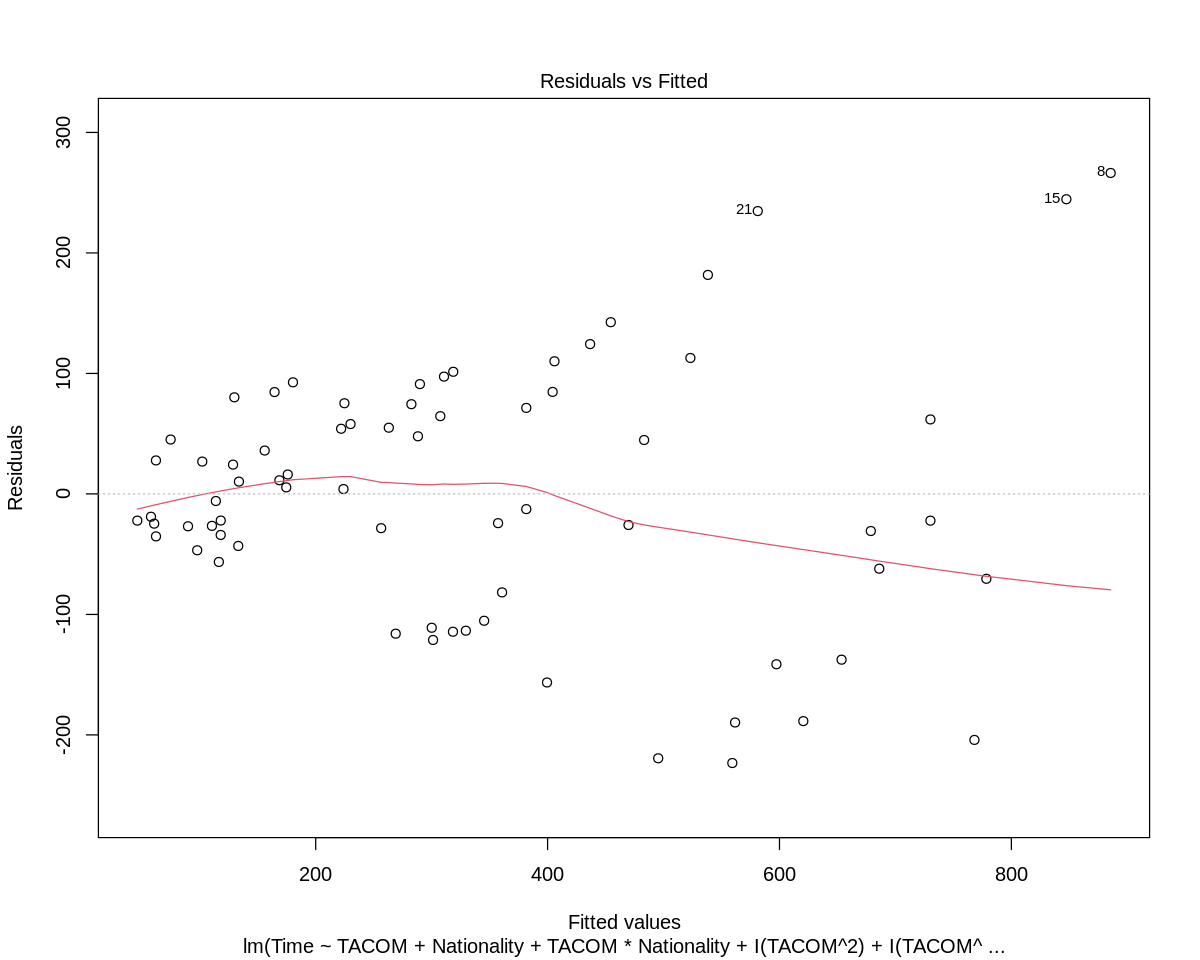

In [ ]:
#Classic residual plot:
plot(C_model, which=1)

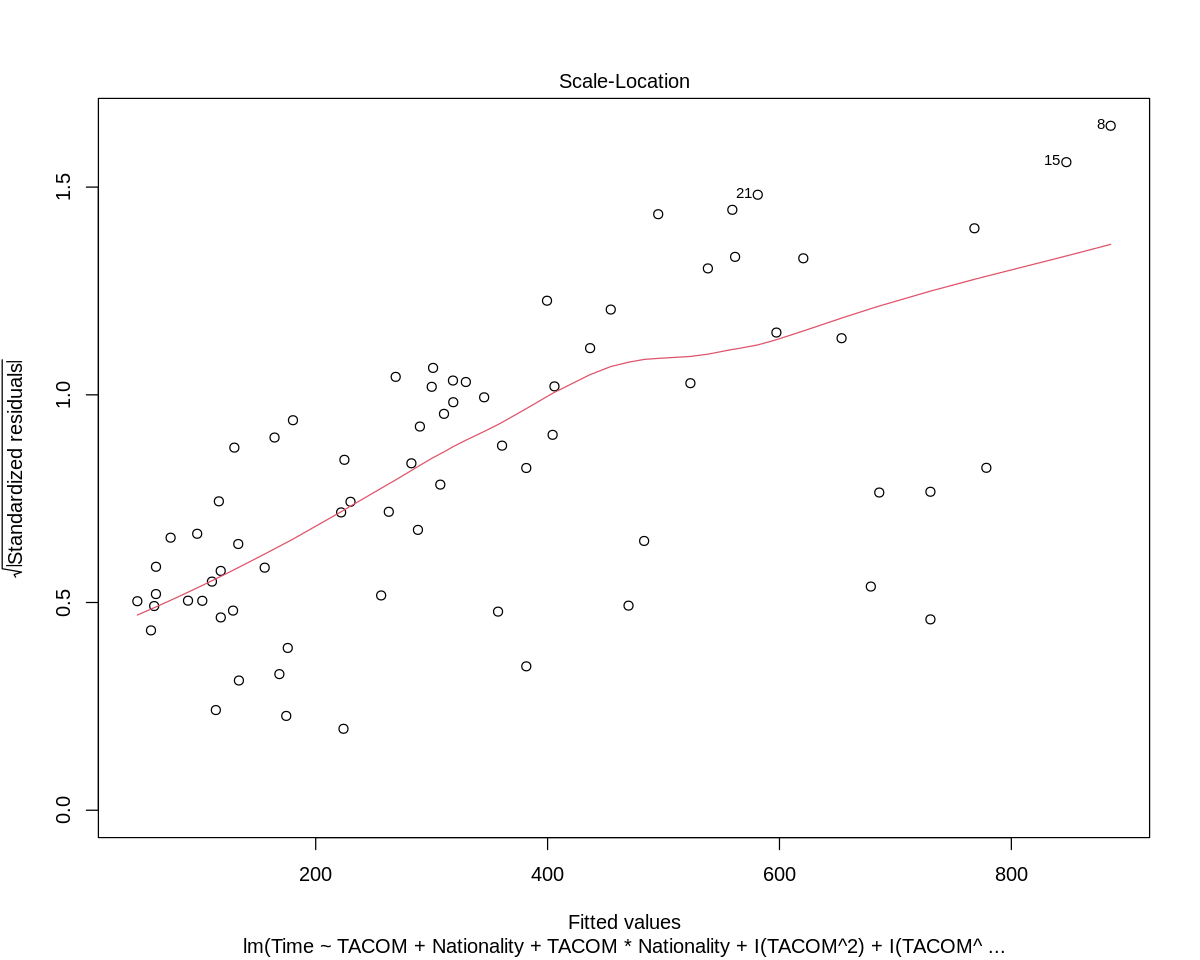

In [ ]:
# Scale-location plot:
plot(C_model, which=3)

In [ ]:
# Q 2C - Comments on the residual plots:

# First plot shows non-constant variance with a megaphone shape.
# Lineality is questionable (the red smooth line slightly deviates from Y=0).
# The second plot also shows that the constant variance is not satisfied (the smooth line has a linear trend).

## D)

Use AICs, BICs, and a nested ANOVA to formally compare the two models.  Comment on what your results imply about which model is preferable.

In [ ]:
AIC(B_model)
AIC(C_model)

[1] 871.2556

[1] 863.5978

In [ ]:
BIC(B_model)
BIC(C_model)

[1] 882.498

[1] 879.3373

In [ ]:
# Comments on AIC/BIC:

# Both AIC and BIC prefers C_model (full model).

In [ ]:
# nested ANOVA
# B_model = reduced model
# C_model = full model

# Ho: Reduced model is sufficient
# H1: Full model is necessary

anova(B_model, C_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,66,903714.8,NA,NA,NA,NA
2,64,765075.6,2,138639.1,5.79871,0.004847701


In [ ]:
# Comments on nested ANOVA:

# There is enough statistical evidence to conclude that the ful model is needed (p = 0.0048)

In [ ]:
# Q 2D - Answer:

# AICs, BICs, and a nested ANOVA suggest that the full model (C_model) has a better fit than the reduced model (B_model).

## E)

Your boss is primarily interested in the impact of task complexity on completion time.  Using your "best" model as determined in the previous question, contrast the modeled completion time for tasks with TACOM scores of 4 to tasks with scores of 6 (these roughly correspond to the 25th and 75th percentiles of TACOM complexity scores).  Perform this contrast separately for  U.S. and non-U.S. NPPWs.  Fully detail your findings, including interpreting estimates of the contrasts; p-values; and 95% CI.  Use whichever standard error estimator you deem most appropriate in your contrasts.  For which nationality is the impact of complexity on completion time most striking?


In [ ]:
# contrast the completion time for tasks with TACOM 4 to 6
emmeans_object <- emmeans(C_model, specs = ~TACOM|Nationality, at = list(TACOM = c(4, 6)))
emmeans_object

Nationality = non-US:
 TACOM emmean   SE df lower.CL upper.CL
     4   70.9 32.4 64     6.27      136
     6  282.7 23.6 64   235.58      330

Nationality = US:
 TACOM emmean   SE df lower.CL upper.CL
     4  128.5 32.4 64    63.84      193
     6  523.5 23.6 64   476.39      571

Confidence level used: 0.95 

In [ ]:
contrast(emmeans_object, method = 'pairwise')

Nationality = non-US:
 contrast        estimate   SE df t.ratio p.value
 TACOM4 - TACOM6     -212 39.3 64  -5.395  <.0001

Nationality = US:
 contrast        estimate   SE df t.ratio p.value
 TACOM4 - TACOM6     -395 39.3 64 -10.062  <.0001


In [ ]:
confint(contrast(emmeans_object, method = 'pairwise'))

,contrast,Nationality,estimate,SE,df,lower.CL,upper.CL
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TACOM4 - TACOM6,non-US,-211.7910,39.26006,64,-290.2220,-133.3600
2,TACOM4 - TACOM6,US,-395.0245,39.26006,64,-473.4555,-316.5936


In [ ]:
# Q 2E Answer:

# Among non-U.S. nuclear power plant workers, the average task completion speed was 211.79 seconds faster for TACOM 4 tasks compared to TACOM 6 tasks.
# This is a statistically significant difference in average speed when comparing the completion times for TACOM 4 and TACOM 6 tasks.
# (p-value < 0.0001; 95% CI: -290.22, -133.36)

# Among U.S. nuclear power plant workers, the average task completion speed was 395.02 seconds faster for TACOM 4 tasks compared to TACOM 6 tasks.
# This is a statistically significant difference in average speed when comparing the completion times for TACOM 4 and TACOM 6 tasks.
# (p-value < 0.0001; 95% CI: -473.46, -316.59)